## Dealing with Climate Data in Python
### Designed by: Udit Bhatia

**Note**: New Python users are advised to familiarize themselves  with basics of python. Refer to "Introduction to Python Programming" by same author. Data used in this tutorial can be downloaded from: https://drive.google.com/file/d/1YPJqld-DqUavlwskj7QudVSoay1TV2IU/view?usp=sharing 


We will use various Python packages. You can install these packages using command:

***conda install xarray***

In Jupyter notebook, you can type:

***!conda isntall xarray --yes***

We will use xarray ( *xarray* needs *netcdf4* as dependency so make sure netcdf4 is installed), matplotlib and pandas as external libraries. *os* and *glob* comes pre-installed so no need to install them.

We will import the packages and chane working directory to the folder using ***os.chdir*** where you have stored the ***merged_temp.nc*** file.

In [165]:
import xarray as xr
import numpy as np
import pandas as pd
import os
os.chdir("/Users/uditbhatia/Documents/python_tutorials/Climate tutorials")
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Note that we have aliased xarray as xr for sake of brewity. We will use command ***xr.open_dataset(file_name)*** to open the netcdf file. You can read more about xarray here:  http://xarray.pydata.org/en/stable/index.html and about netcdf files here: https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_introduction.html. However, for simplicity, think of these as a way to store multidimensional data. As you can imagine, climate data (Such as temperature) will have location (specified using latitude and longitude) and time (temperature on given day) as its attributes. Hence, netcdf files are excellent way to store multidimensional data. 

Here, we will use ***merged_temp.nc*** datafile that contains daily maximum temperature for the United States (Hawaii, Puerto Rico, and Alaska excluded). Note the three dimensions: lat, lon, and time. Tmax is the data variable stored in ***merged_temp.nc***

In [152]:
temperature =xr.open_dataset("merged_temp.nc")
print(temperature)

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 150, time: 14591)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-12
  * lat      (lat) float32 49.75 49.25 48.75 48.25 ... 21.75 21.25 20.75 20.25
  * lon      (lon) float32 230.25 230.75 231.25 231.75 ... 303.75 304.25 304.75
Data variables:
    tmax     (time, lat, lon) float64 ...


***Visualizing datasets***: Let us try to visualize the maximum temperature on 4th July, 2018 as map.From ***temperature***, select the timepoint of interest (in present case, July 4, 2018). Let us save it in variable named ***temp***. When we print temp, we can notice that ***time*** is no longer a dimension as we are talking about one specific timepoint. We will plot ***temp['tmax']*** using plot command and ***plt.show()*** to show the generated plot. You should be able to plot nice map of US showing maximum temperature at each location on July 4, 2018!

<xarray.Dataset>
Dimensions:  (lat: 60, lon: 150)
Coordinates:
    time     datetime64[ns] 2018-04-07
  * lat      (lat) float32 49.75 49.25 48.75 48.25 ... 21.75 21.25 20.75 20.25
  * lon      (lon) float32 230.25 230.75 231.25 231.75 ... 303.75 304.25 304.75
Data variables:
    tmax     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan


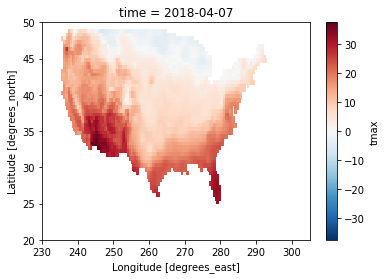

In [163]:
temp = temperature.sel(time = '2018-04-07')
print(temp)
temp['tmax'].plot()
plt.show()

In the context of climate, we are concerned about long term averages. Hence, we will now generate long term statistics for entire US. First, we will compute mean along the latitudes followed by mean along longitudes.This will leave us with only one dimension: ***time***. This is still daily data averaged over entire United States. We will generate annual mean from daily time-series. 

In [167]:
mean_temp = temperature.mean(dim='lat')
mean_temp = mean_temp.mean(dim = 'lon')
print(mean_temp)

<xarray.Dataset>
Dimensions:  (time: 14591)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2018-12-12
Data variables:
    tmax     (time) float64 -1.793 -3.462 -3.884 -5.142 ... 4.294 5.751 6.74


***Annual Mean***: To generate annual mean from daily time-series, we will use ***groupby*** command. Since we are interested in ***annual mean***, we will group by ***time*** and ***year***.  Once we group the data, we will compute ***mean*** along ***time*** dimension. Note that how Dimensions change. We started from a 3-D object and ended up with 1-D object! That's the beauty of xarray!!!!

In [168]:
annual_mean  = mean_temp.groupby('time.year').mean('time')
print(annual_mean)

<xarray.Dataset>
Dimensions:  (year: 40)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2014 2015 2016 2017 2018
Data variables:
    tmax     (year) float64 14.56 15.89 17.09 16.08 ... 18.11 18.45 18.18 18.14


***Plot the time series***: Now that we have converted the 3-D or multidimensional object to 1-D object, we can use simple libraries like Pandas (refer to chapter 4 of Introduction to Python) and perform simple analysis.

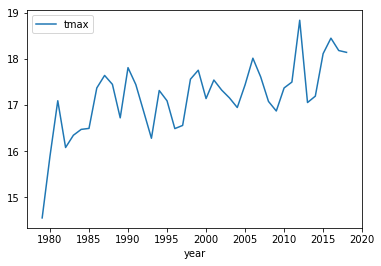

In [170]:
df = annual_mean.to_dataframe()
df.plot()
plt.show()

***Advance topic: Trend analysis***: We can clearly see from the plot above that there is linear trend as we progress ahead in time. In climate data analysis, we have to often quantify these trends. Quantification entail questions like:

    what is the rate of change of temperature?
    Is this trend statistically signficant?
    
We will use another library named numpy to perform trend analysis to begin with. numpy has a function ***polyfit*** that tells us slope and intercept of the best fit line. Once we obtain coefficients, and residuals, we will plot a linear trend on fluctuating annual time-series.

Slope [0.04351818]
Intercept [16.33222757]


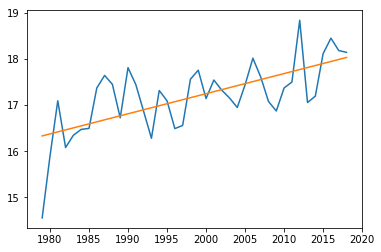

In [171]:
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(df.index)),df,1,full=True)

print('Slope ' + str(coefficients[0]))
print('Intercept ' + str(coefficients[1]))


x = range(1979, 2019)
y = ([coefficients[0]*x + coefficients[1] for x in range(len(df))])
plt.plot(df)
plt.plot(x,y)

Now that you know the basics of xarray, try to generate following plots:
    
1. Compute and average annual temperature for all the points between the latitude of 48.75 and 25. [Hint: you can use command ***temperature.sel(lat = slice(48.75,25))*** and follow similar steps outlined in tutorial

2. Compute and plot the average annual temperature for month of March April May. An example with December, January, February has been done for you:

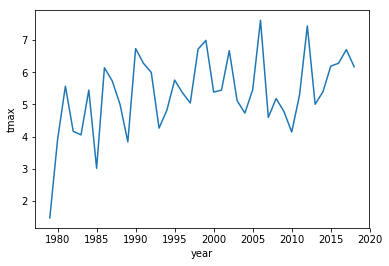

In [200]:
ds_DJF = mean_temp.where(mean_temp['time.season'] == 'DJF')
DJF_mean = ds_DJF.groupby('time.year').mean(dim = "time")
DJF_mean.tmax.plot()